### Extend Audio Classification Use Cases: Enviroment and Animal Sounds



###  Project Overview



We have developed a specialized audio classification model using a pre-trained EfficientAT network to identify and distinguish between environmental sounds (such as rain, wind, and fire) and animal calls. In order to improve real-world performance, the training data includes mixed audio samples that simulate overlapping events—for example, rain occurring alongside bird calls and this helps reflecting the acoustic environments found in natural settings like in the Otways region.

### Dataset  

The dataset includes 1,627 audio samples and these are divided into two main categories: These are animal sounds and environmental sounds. The environmental category split into four distinct classes: fire, wind, rain, and thunder. As these represent common natural sounds that can impact or might obscur animal vocalizations in the wild.  In contrast, animal sounds are grouped into a single class. Each audio file has been preprocessed into a mel-spectrogram and format sampled at 16 kHz and stored as a .pt file.




### Model Architecture: EfficientAT and `mn40_as_ext`

https://github.com/fschmid56/EfficientAT


EfficientAT is a set of audio models that are designed to be able to recognize sounds accurately and is both fast and lightweight.  Instead of using large, complex models like Transformers, EfficientAT uses a similiar approach but uses convolutional networks, the purpose being is that this makes it more eaiser to run and is overall more efficient for real-time use. To provide strong performance, EfficientAT models are trained to learn from larger models—a method called knowledge distillation— this is the high accuracy is maintained without the use of heavy computing power. The model that is utlizied in this project is the highest performing of this group: mn40_as_ext which was pre-trained on AudioSet. This has has been trained longer and overall captures more detail to better understand different types of sounds. We use a pre-trained model since it already contains general audio knowledge learned from a large dataset (AudioSet) and this reduces the amount of data and time needed for training. To take advantage of the model’s existing audio knowledge, the base layers are frozen to be able to keep their weights unchanged and to only train the final classification layer. This results in making the training faster as it requires less data and allows the model to be able focus on learning our custom sound categories, such as different weather conditions and animal calls, without forgetting the general audio features it has already learned. Notably, the mn40_as model appears on the AudioSet classification leaderboard, its ensemble version ranks among the top-performing CNN-based models.

---

###  Data Augmentation Techniques

A series of augmentations to the input mel-spectrograms during training are utlized during training. This helps improve the model’s robustness and generalization, 

These include:

* **Time and frequency masking**,  Hides parts of the spectrogram to encourage contextual learning.
* **Gaussian noise**, this simulates real-world background interference.
* **Random pitch and time shifts**, reflects variation in acoustic events.
* **Time-stretching**, alters playback speed but  preserving pitch.

The augmentations listed are both applied randomly and in combination. This will assist the model generalize to varied acoustic environments.

---



### Overlap Simulation  

We want to be able to simulate real-world acoustic scenarios,  therfore **overlap simulation** is added during training. Two  samples ar randomly selected and are mixed together, with their labels combined. For example, a clip of rain might be blended with bird calls, this should mimic a natural environment where multiple sounds often occur simultaneously. The goal is to help the model be able to learn to recognize overlapping sound events to improve its overall robustness in real-life situations.



###  Evaluation Metrics and Results


The model is evaluated using multi-label classification metrics, including accuracy, precision, recall, and F1-score. A confusion matrix heatmap provides a visual overview of class-wise performance. Together, these evaluation methods offer a comprehensive view of how well the model distinguishes between overlapping and acoustically similar sounds, especially in complex environmental conditions.



### Real-World Use Case

This model can support wildlife monitoring efforts in areas like the Otways region by being able to detect environmental changes and animal presence using acoustic signals. By automatically identifying sounds such as rain, wind, or animal calls, it can provide non-invasive monitoring of animals in the region. This can also be extended to detect potential threats like bushfires or any habitat disturbance in near real-time.



Download: audio_16k_mp3_mel_binary from https://drive.google.com/drive/u/2/folders/1hF-x9Mxoj_lWh-j2NQQwythWR_12Hd0F

In [1]:
# https://github.com/fschmid56/EfficientAT (download the model from here)

import os
os.chdir(r"C:\Users\riley\Documents\Project-Echo\src\Prototypes\EfficientAT")



C:\Users\riley\AppData\Local\Temp\ipykernel_35344\3632443034.py:126: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mel = torch.load(path)


MN(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

Epoch 1/5:
  Train Loss: 0.4081 | Train Acc: 85.35%
  Val   Loss: 0.2473 | Val   Acc:   90.14%


Epoch 2/5:
  Train Loss: 0.3053 | Train Acc: 87.46%
  Val   Loss: 0.2043 | Val   Acc:   92.50%


Epoch 3/5:
  Train Loss: 0.2867 | Train Acc: 88.45%
  Val   Loss: 0.1886 | Val   Acc:   93.00%


Epoch 4/5:
  Train Loss: 0.2695 | Train Acc: 88.83%
  Val   Loss: 0.1779 | Val   Acc:   93.09%


Epoch 5/5:
  Train Loss: 0.2641 | Train Acc: 88.95%
  Val   Loss: 0.1724 | Val   Acc:   93.46%

Summary Classification Report:
Accuracy: 0.8003
Macro Avg - Precision: 0.7481, Recall: 0.7061, F1: 0.7003
Weighted Avg - Precision: 0.8434, Recall: 0.8003, F1: 0.8065


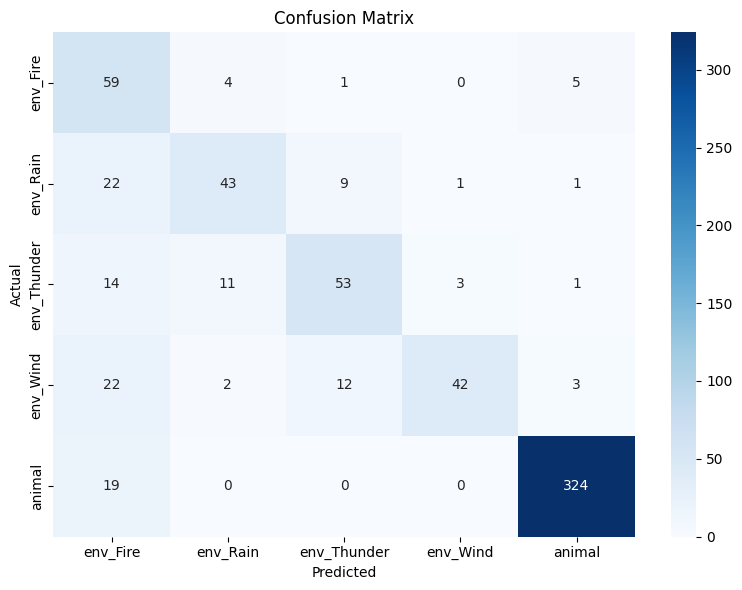

In [8]:
import os
import sys
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, Subset
from pathlib import Path
import random
import torchaudio.transforms as T
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load Pretrained EfficientAT Model with base frozen) 
def load_mn40_as_ext_model(device):
    project_root = r"C:\Users\riley\Documents\Project-Echo\src\Prototypes"
    efficientat_root = os.path.join(project_root, "EfficientAT")
    
    #Add EfficientAT repo to Python path if needed
    if efficientat_root not in sys.path:
        sys.path.append(efficientat_root)
    from models.mn.model import get_model as get_mn
    model = get_mn(pretrained_name="mn40_as_ext", width_mult=4.0)
    model.to(device)
    
     # Freeze all the layers except classifier for fine-tuning
    for name, param in model.named_parameters():
        if "classifier" not in name:
            param.requires_grad = False
    return model


# Data Augmentation for Training
class Augmentation(nn.Module):
    def __init__(self, time_mask_param=30, freq_mask_param=15, noise_std=0.05,
                 max_time_shift=5, max_pitch_shift=2, time_stretch_range=(0.8, 1.2)):
        super().__init__()
        self.time_mask = T.TimeMasking(time_mask_param)
        self.freq_mask = T.FrequencyMasking(freq_mask_param)
        self.noise_std = noise_std #Standard deviation of Gaussian noise
        self.noise_std = noise_std  # Standard deviation of Gaussian noise
        self.max_time_shift = max_time_shift  # Max frame shift for time rolling
        self.max_pitch_shift = max_pitch_shift  # Max bin shift for pitch rolling
        self.time_stretch_range = time_stretch_range  # Stretch factor range (e.g., 0.8x to 1.2x)

    def forward(self, spec):
        """
        Applies a random subset of the augmentations to the input spectrogram.
        """
        # Apply time and frequency masking
        spec = self.time_mask(self.freq_mask(spec))

        # Add Gaussian noise 
        if random.random() < 0.5:
            spec += torch.randn_like(spec) * self.noise_std

        # Random roll in time 
        if random.random() < 0.5:
            spec = torch.roll(spec, random.randint(-self.max_time_shift, self.max_time_shift), dims=2)

        # Random roll in frequency
        if random.random() < 0.5:
            spec = torch.roll(spec, random.randint(-self.max_pitch_shift, self.max_pitch_shift), dims=1)

        # Random time stretching 
        if random.random() < 0.5:
            orig_time = spec.shape[2]
            factor = random.uniform(*self.time_stretch_range)
            new_time = int(orig_time * factor)

            # Resize spectrogram in time dimension using interpolation
            spec = F.interpolate(spec.unsqueeze(0), size=(spec.shape[1], new_time),
                                 mode='bilinear', align_corners=False).squeeze(0)

            # Ensure the output length matches input by cropping or padding
            if new_time > orig_time:
                spec = spec[:, :, :orig_time]
            else:
                spec = F.pad(spec, (0, orig_time - new_time))

        return spec

    
#Custom dataset to load mel spectrograms for animal and environmental sounds. 
class CombinedEchoDataset(Dataset):
     # Initialize dataset, assign labels, and load file paths.
    def __init__(self, domain_dirs, transform=None, p_overlap=0.3):
        self.samples = []
        self.class_to_idx = {}
        self.transform = transform
        self.p_overlap = p_overlap

        idx = 0
        for domain, root_path in domain_dirs.items():
            root = Path(root_path)
            if domain == "env":
                for subfolder in sorted(d.name for d in root.iterdir() if d.is_dir()):
                    class_name = f"{domain}_{subfolder}"
                    self.class_to_idx[class_name] = idx
                    idx += 1
                    for f in (root / subfolder).glob("*.pt"):
                        self.samples.append((str(f), class_name))
            else:
                class_name = domain  # just "animal"
                if class_name not in self.class_to_idx:
                    self.class_to_idx[class_name] = idx
                    idx += 1
                for f in root.glob("*.pt"):
                    self.samples.append((str(f), class_name))

        self.num_classes = len(self.class_to_idx)

    
    # Return total number of samples.
    def __len__(self):
        return len(self.samples)
    
    # Load one spectrogram and one-hot label (with optional transform).

    def get_sample(self, idx):
        path, class_name = self.samples[idx]
        mel = torch.load(path)
        if self.transform:
            mel = self.transform(mel)
        label = torch.zeros(self.num_classes, dtype=torch.float32)
        label[self.class_to_idx[class_name]] = 1.0
        return mel, label

    # Return sample, optionally mixed with another for multi-label overlap.
    def __getitem__(self, idx):
        mel, label = self.get_sample(idx)
        if self.p_overlap > 0 and random.random() < self.p_overlap:
            idx2 = random.choice([i for i in range(len(self.samples)) if i != idx])
            mel2, label2 = self.get_sample(idx2)
            min_T = min(mel.shape[2], mel2.shape[2])
            mel = mel[:, :, :min_T]
            mel2 = mel2[:, :, :min_T]
            mel = (mel + mel2) / 2.0
            label = torch.maximum(label, label2)
        return mel, label



# Training and return average loss and accuracy
def train_epoch(model, loader, epoch, num_epochs, device, optimizer, criterion, threshold=0.5):
    model.train()
    total_loss, total_acc, total_samples = 0.0, 0.0, 0
    for x, y in tqdm(loader, desc=f"Epoch {epoch}/{num_epochs} [Train]", leave=False):
        if x.dim() == 3:
            x = x.unsqueeze(1)
        x, y = x.to(device), y.to(device)
        output = model(x)
        if isinstance(output, tuple): output = output[0]
        loss = criterion(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_size = x.size(0)
        total_loss += loss.item() * batch_size
        total_samples += batch_size
        preds = (torch.sigmoid(output) > threshold).float()
        total_acc += (preds == y).float().mean().item() * batch_size
    return total_loss / total_samples, total_acc / total_samples


# Evaluate the model on validation data
def evaluate(model, loader, epoch, num_epochs, device, criterion, threshold=0.5):
    model.eval()
    total_loss, total_acc, total_samples = 0.0, 0.0, 0
    with torch.no_grad():
        for x, y in tqdm(loader, desc=f"Epoch {epoch}/{num_epochs} [Val]", leave=False):
            if x.dim() == 3:
                x = x.unsqueeze(1)
            x, y = x.to(device), y.to(device)
            output = model(x)
            if isinstance(output, tuple): output = output[0]
            loss = criterion(output, y)
            batch_size = x.size(0)
            total_loss += loss.item() * batch_size
            total_samples += batch_size
            preds = (torch.sigmoid(output) > threshold).float()
            total_acc += (preds == y).float().mean().item() * batch_size
    return total_loss / total_samples, total_acc / total_samples


# Get predictions and labels from the model for evaluation/reporting
def get_predictions(model, loader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y in loader:
            if x.dim() == 3:
                x = x.unsqueeze(1)
            x = x.to(device)
            output = model(x)
            if isinstance(output, tuple): output = output[0]
            probs = torch.sigmoid(output)
            preds = (probs > threshold).float().cpu().numpy()
            all_preds.append(preds)
            all_labels.append(y.cpu().numpy())
    return np.concatenate(all_labels, axis=0), np.concatenate(all_preds, axis=0)


# training parameters and paths
best_params = {
    "lr": 0.0001,
    "dropout": 0.3,
    "weight_decay": 0.0001,
    "p_overlap": 0.1,
    "epochs": 5
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
project_root = r"C:\Users\riley\Documents\Project-Echo\src\Prototypes"
domain_dirs = {
    "env": os.path.join(project_root, "data", "audio_16k_mp3_mel_binary", "environment"),
    "animal": os.path.join(project_root, "data", "audio_16k_mp3_mel_binary", "animal")
}

# Load model and prepare datasets
train_transform = Augmentation()
base_model = load_mn40_as_ext_model(device)
full_dataset = CombinedEchoDataset(domain_dirs, transform=None, p_overlap=0.0)
NUM_CLASSES = len(full_dataset.class_to_idx)

#Split dataset into train/val subsets
indices = list(range(len(full_dataset)))
random.shuffle(indices)
split = int(0.8 * len(full_dataset))
train_dataset = Subset(CombinedEchoDataset(domain_dirs, transform=train_transform, p_overlap=best_params["p_overlap"]), indices[:split])
val_dataset = Subset(CombinedEchoDataset(domain_dirs, transform=None, p_overlap=0.0), indices[split:])
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Determine input feature size for classifier
sample, _ = full_dataset[0]
sample = sample.unsqueeze(0).to(device) if sample.dim() == 3 else sample.to(device)
features = sample
for name, module in base_model.named_children():
    if name == "classifier":
        break
    features = module(features)
channels = features.shape[1]

# Replace and initialize classifier head
base_model.classifier = nn.Sequential(
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(channels, 256),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(256, NUM_CLASSES)
)
for param in base_model.classifier.parameters():
    param.requires_grad = True

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(base_model.classifier.parameters(),
                       lr=best_params["lr"],
                       weight_decay=best_params["weight_decay"])


# Track loss and accuracy
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
for epoch in range(1, best_params["epochs"] + 1):
    # Train
    train_loss, train_acc = train_epoch(base_model, train_loader, epoch, best_params["epochs"], device, optimizer, criterion)
    
    # Validate
    val_loss, val_acc = evaluate(base_model, val_loader, epoch, best_params["epochs"], device, criterion)
    
    # Save metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Print progress
    print(f"Epoch {epoch}/{best_params['epochs']}:")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc * 100:.2f}%")
    print(f"  Val   Loss: {val_loss:.4f} | Val   Acc:   {val_acc * 100:.2f}%")


#Evaluation Report 
true_labels, pred_labels = get_predictions(base_model, val_loader, device)
y_true = np.argmax(true_labels, axis=1)
y_pred = np.argmax(pred_labels, axis=1)

report = classification_report(y_true, y_pred, zero_division=0, output_dict=True)
print("\nSummary Classification Report:")
print(f"Accuracy: {report['accuracy']:.4f}")
print("Macro Avg - Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}".format(
    report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']))
print("Weighted Avg - Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}".format(
    report['weighted avg']['precision'], report['weighted avg']['recall'], report['weighted avg']['f1-score']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=full_dataset.class_to_idx.keys(),
            yticklabels=full_dataset.class_to_idx.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [9]:
from sklearn.metrics import confusion_matrix
from collections import defaultdict
import numpy as np

#Generate predictions 
true_labels, pred_labels = get_predictions(base_model, val_loader, device=device)

# Convert multi-hot labels to single class predictions
true_single = np.argmax(true_labels, axis=1)
pred_single = np.argmax(pred_labels, axis=1)

# Confusion Matrix 
cm = confusion_matrix(true_single, pred_single)

# Group-wise accuracy breakdown
classes = list(full_dataset.class_to_idx.keys())
idx_to_class = {i: c for c, i in full_dataset.class_to_idx.items()}

group_counts = defaultdict(lambda: {'correct': 0, 'total': 0})

for i in range(len(classes)):
    class_name = idx_to_class[i]
    group = class_name if class_name == "animal" else f"{class_name.split('_')[0]}_{class_name.split('_')[1]}"
    
    correct = cm[i, i]
    total = np.sum(cm[i])
    
    group_counts[group]['correct'] += correct
    group_counts[group]['total'] += total

# Print results 
print("\nClassification Summary by Class Group")
for group, stats in group_counts.items():
    correct = stats['correct']
    total = stats['total']
    incorrect = total - correct
    acc = correct / total if total > 0 else 0.0
    print(f"{group:<12} | Total: {total:<4} | Correct: {correct:<4} | Misclassified: {incorrect:<4} | Acc: {acc:.2%}")



C:\Users\riley\AppData\Local\Temp\ipykernel_35344\3632443034.py:126: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mel = torch.load(path)



Classification Summary by Class Group
env_Fire     | Total: 69   | Correct: 59   | Misclassified: 10   | Acc: 85.51%
env_Rain     | Total: 76   | Correct: 43   | Misclassified: 33   | Acc: 56.58%
env_Thunder  | Total: 82   | Correct: 53   | Misclassified: 29   | Acc: 64.63%
env_Wind     | Total: 81   | Correct: 42   | Misclassified: 39   | Acc: 51.85%
animal       | Total: 343  | Correct: 324  | Misclassified: 19   | Acc: 94.46%


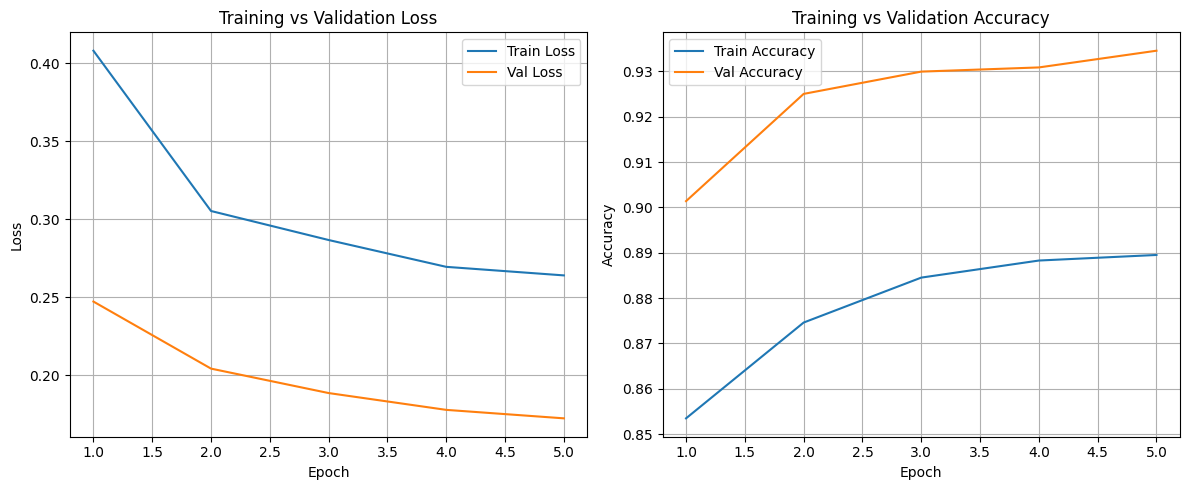

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Plot thr Loss and Accuracy Curves 
epochs = list(range(1, best_params["epochs"] + 1))
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, val_accuracies, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

